# Data Analysis Pipeline

## Load Data
- The data is in csv format, therefore the delimiter is comma, no need to skip rows or columns.
- We can done this using pandas.

In [1]:
import pandas as pd

df = pd.read_csv('../../data/raw/netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


## Clean Data
- The column "**show_id**" is not important since it's the index of each row. Moreover, the "**title**" and "**description**" is also not needed.
- The rows having NaN value should be replaced too.

In [2]:
df.drop(['show_id', 'title', 'description'], inplace = True, axis = 1)
df.dropna(axis=0, how='any', inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,type,director,cast,country,date_added,release_year,rating,duration,listed_in
0,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
1,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
2,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
3,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
4,TV Show,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"


## Process Data
- Change the column named "**listed_in**" to "**Genre**" and capitalize orther columns' names.

In [3]:
df = df.rename(columns = {
    'type': 'Type',
    'director': 'Director',
    'cast': 'Cast',
    'country': 'Country',
    'date_added': 'Date Added',
    'release_year': 'Release Year',
    'rating': 'Rating',
    'duration': 'Duration',
    'listed_in': 'Genre',
})
df.head()

,Type,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre
0,Movie,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies"
1,Movie,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies"
2,Movie,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi..."
3,Movie,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas
4,TV Show,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries"


## Wrangle Data
- Format the "**data_added**" and "**release_year**" columns to Datetime object.
- Format the "**duration**" column to integer (TV shows 👉 season, Movie 👉 minute).
- Put the casts in "**cast**" column, genres in "**genre**", and countries in "**country**" column into lists.

**Save processed data to a csv file**

In [4]:
df['Date Added'] = pd.to_datetime(df['Date Added']).dt.date
df['Release Year'] = pd.to_datetime(df['Release Year'], format='%Y').dt.year
df['Duration'] = pd.to_numeric(df['Duration'].str.split().apply(lambda x: x[0]))
df['Cast'] = df['Cast'].str.split(',')
df['Country'] = df['Country'].str.split(',')
df['Genre'] = df['Genre'].str.split(',')
df

,Type,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre
0,Movie,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016-12-23,2016,TV-MA,93,"[Dramas, International Movies]"
1,Movie,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2018-12-20,2011,R,78,"[Horror Movies, International Movies]"
2,Movie,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2017-11-16,2009,PG-13,80,"[Action & Adventure, Independent Movies, Sci..."
3,Movie,Robert Luketic,"[Jim Sturgess, Kevin Spacey, Kate Bosworth, ...",[United States],2020-01-01,2008,PG-13,123,[Dramas]
4,TV Show,Serdar Akar,"[Erdal Beşikçioğlu, Yasemin Allen, Melis Bir...",[Turkey],2017-07-01,2016,TV-MA,1,"[International TV Shows, TV Dramas, TV Myste..."
...,...,...,...,...,...,...,...,...,...
4803,Movie,Ruben Fleischer,"[Jesse Eisenberg, Woody Harrelson, Emma Ston...",[United States],2019-11-01,2009,R,88,"[Comedies, Horror Movies]"
4804,Movie,Shlok Sharma,"[Shashank Arora, Shweta Tripathi, Rahul Kuma...",[India],2018-07-01,2018,TV-MA,94,"[Dramas, Independent Movies, International M..."
4805,Movie,Peter Hewitt,"[Tim Allen, Courteney Cox, Chevy Chase, Kat...",[United States],2020-01-11,2006,PG,88,"[Children & Family Movies, Comedies]"
4806,Movie,Josef Fares,"[Imad Creidi, Antoinette Turk, Elias Gergi, ...","[Sweden, Czech Republic, United Kingdom, De...",2020-10-19,2005,TV-MA,99,"[Dramas, International Movies]"


In [5]:
df.to_csv('processed_netflix_data.csv')

# Method Chaining and writing Python programs

In [6]:
from script.project_functions import load_and_process

load_and_process('../../data/raw/netflix.csv').head(3)

,Type,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Added Delay
0,Movie,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016-12-23,2016,TV-MA,93,"[Dramas, International Movies]",0.0
1,Movie,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2018-12-20,2011,R,78,"[Horror Movies, International Movies]",7.0
2,Movie,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2017-11-16,2009,PG-13,80,"[Action & Adventure, Independent Movies, Sci...",8.0


# Exploratory Data Analysis

## Step 1: Understand, Load, and Clean Data

In [7]:
import sys
sys.path.append('../')
from script import project_functions as pf

df = pf.load_and_process('../../data/raw/netflix.csv')
df.head(3)

,Type,Director,Cast,Country,Date Added,Release Year,Rating,Duration,Genre,Added Delay
0,Movie,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],2016-12-23,2016,TV-MA,93,"[Dramas, International Movies]",0.0
1,Movie,Gilbert Chan,"[Tedd Chan, Stella Chung, Henley Hii, Lawre...",[Singapore],2018-12-20,2011,R,78,"[Horror Movies, International Movies]",7.0
2,Movie,Shane Acker,"[Elijah Wood, John C. Reilly, Jennifer Conne...",[United States],2017-11-16,2009,PG-13,80,"[Action & Adventure, Independent Movies, Sci...",8.0


## Step 2: Explore

In [8]:
from pandas_profiling import ProfileReport

%matplotlib inline
%config InlineBackend.figure_format='retina'

### Overal exploration

In [9]:
ProfileReport(df).to_notebook_iframe()

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Release year, Adding delay year, and duration correlation

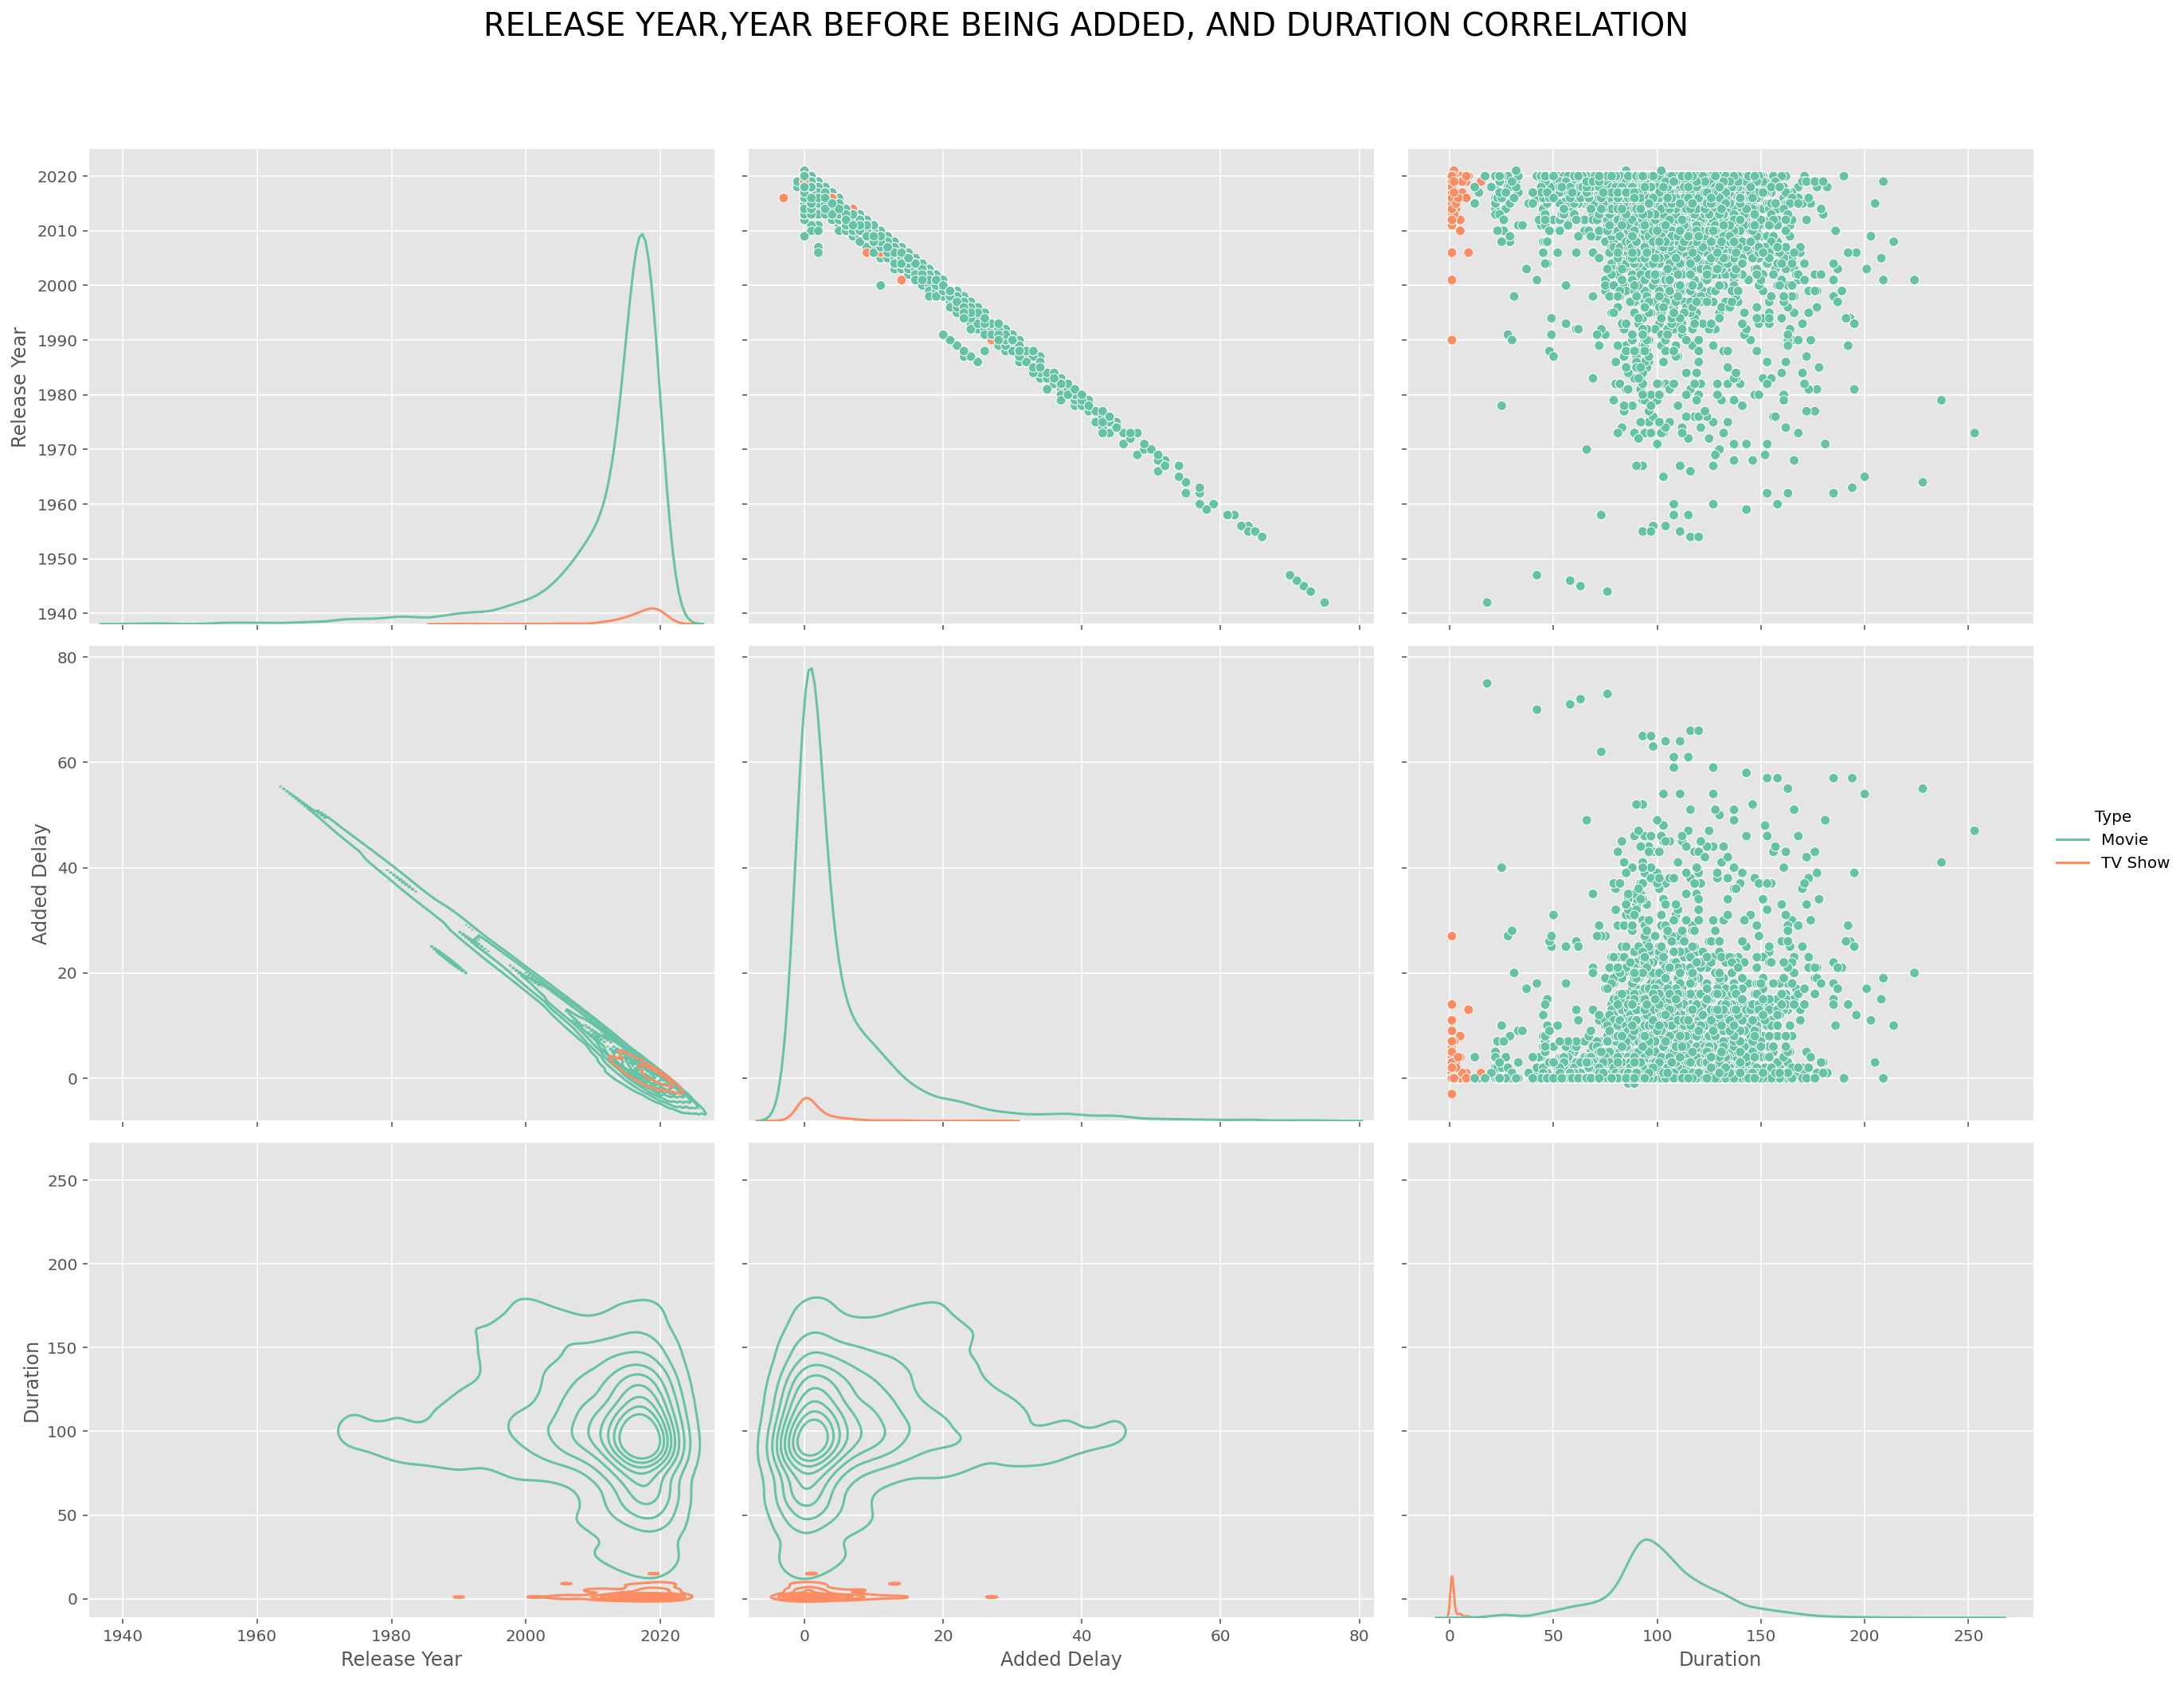

In [10]:
pf.visualize_pair_grid(df)

- There's a strong linear correlation between the deplay of Netflix in adding movies and their release year.
- There's Guass distribution in Added Delay and Release Year columns 👉 the data is not bias in these 2 columns.

### Netflix's shows genres proportion

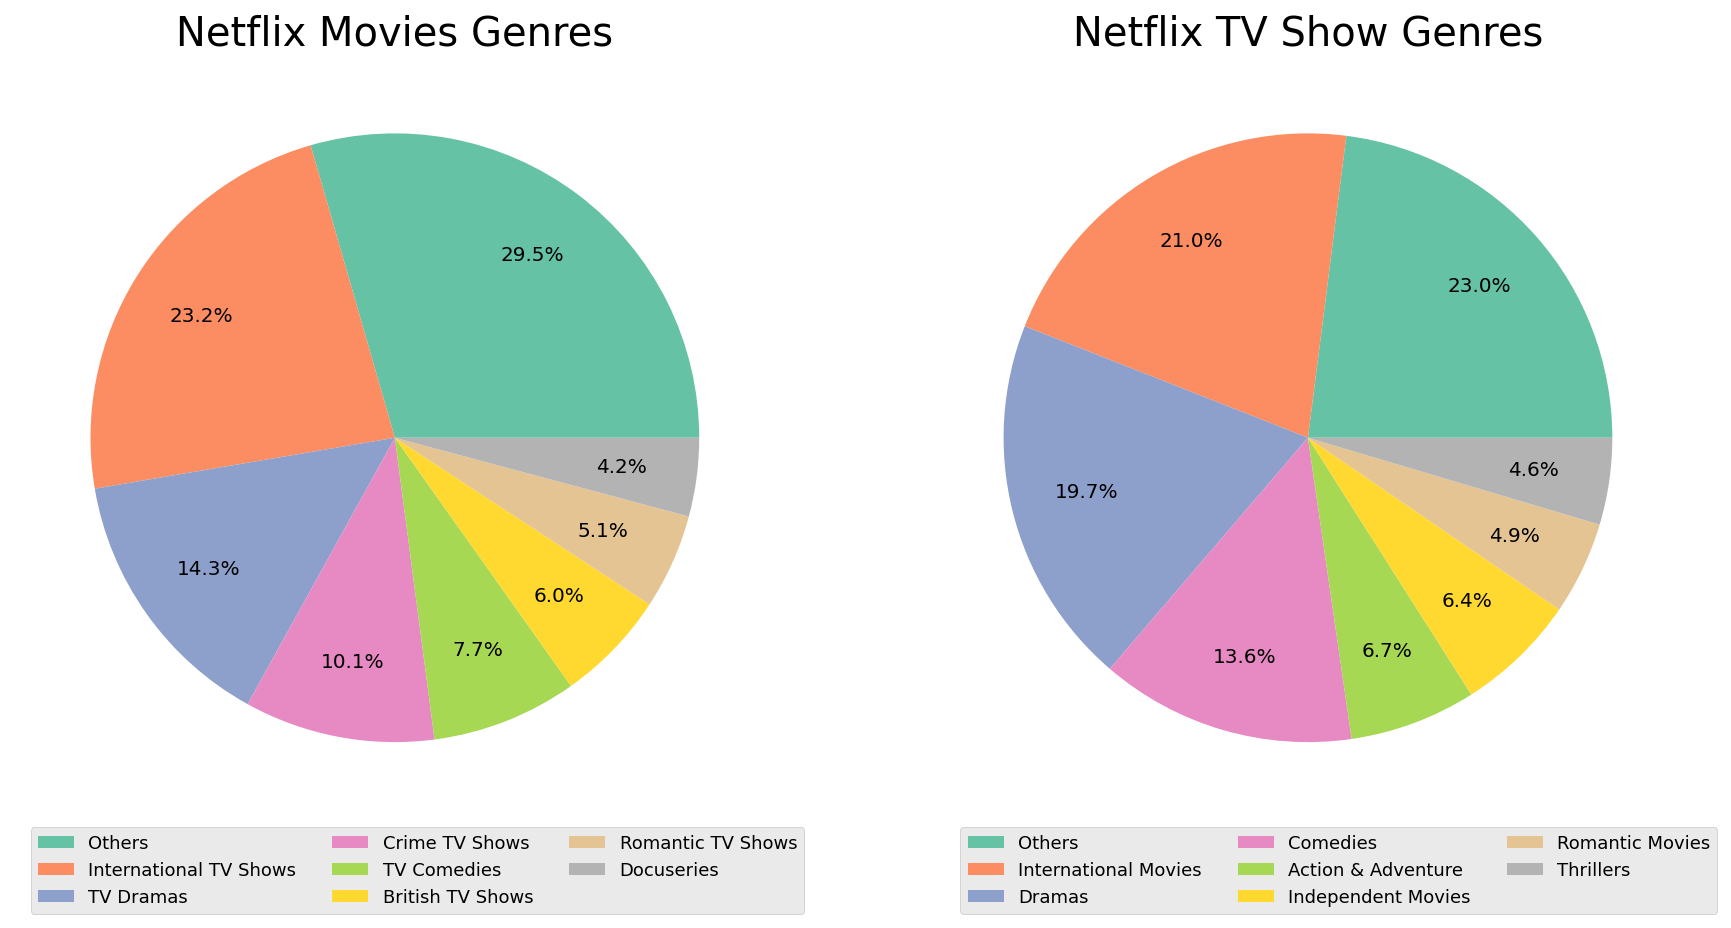

In [11]:
pf.visualize_pie_chart_for_genres(df)

International shows, dramas, crimes, and comedies lead both type of show on Netflix.

### Number of shows per rating

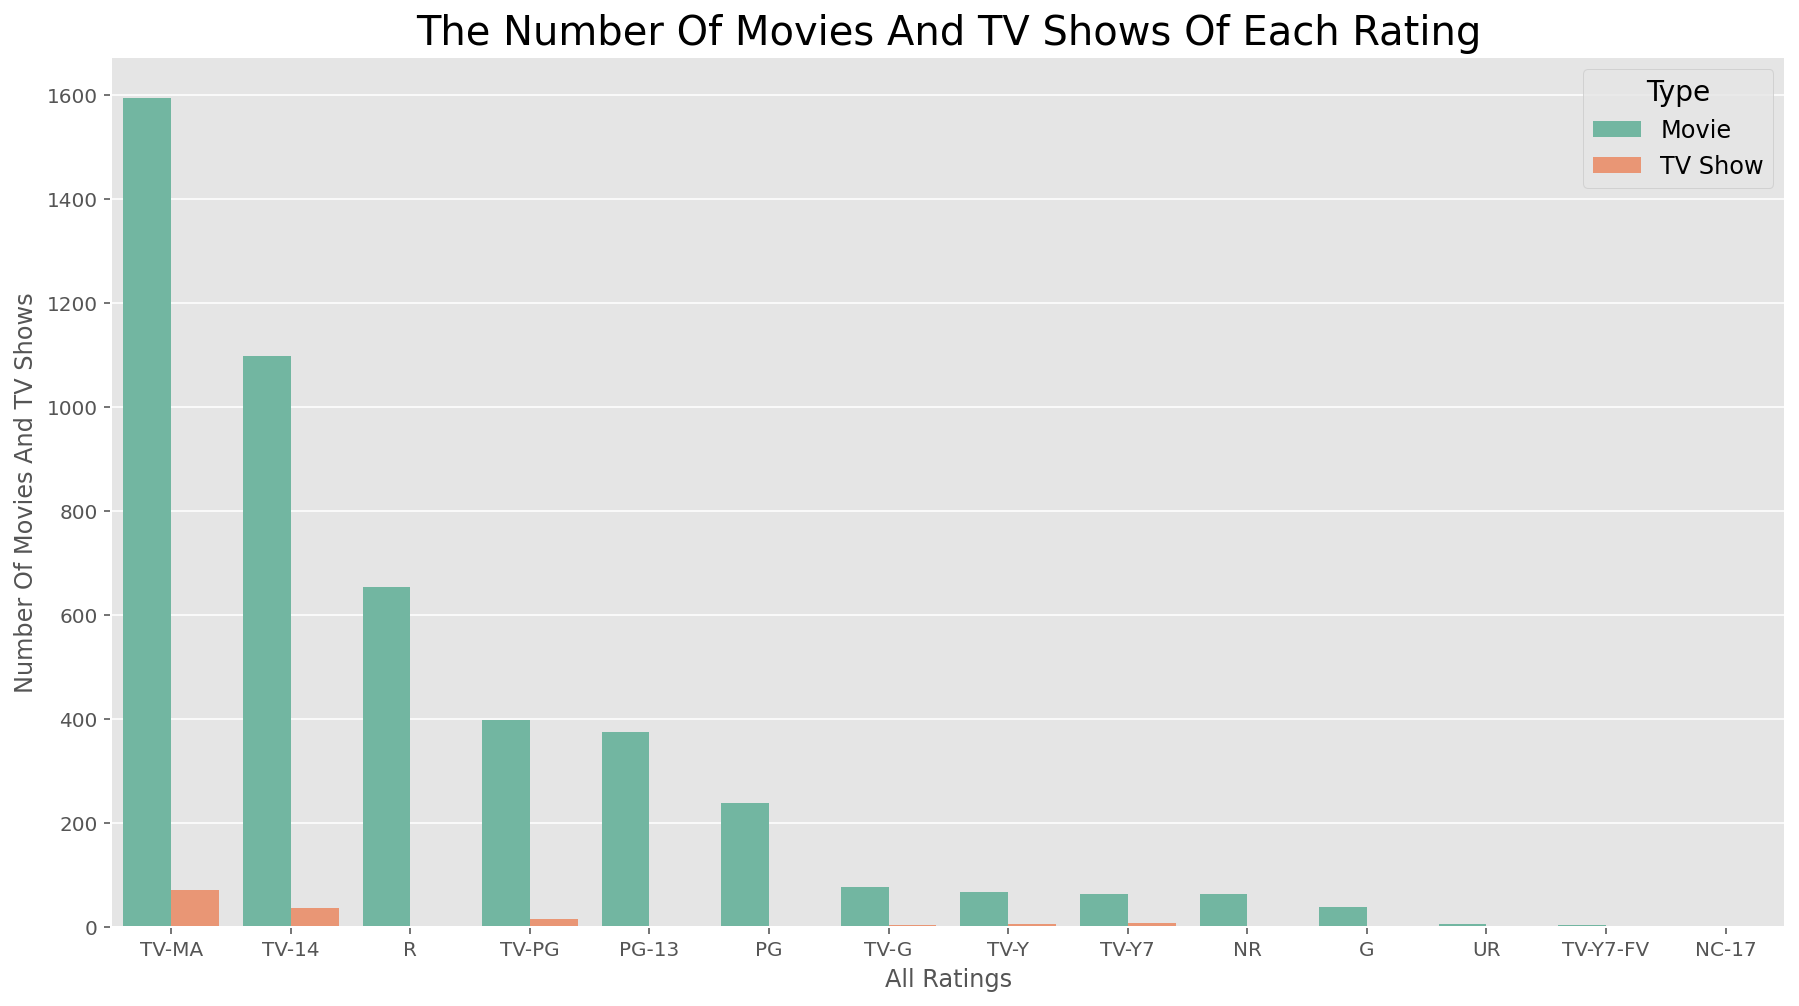

In [12]:
pf.visualize_bar_chart_for_ratings(df)

Nothing is really interesting in this graph, just listing.

### Top Netflix directors

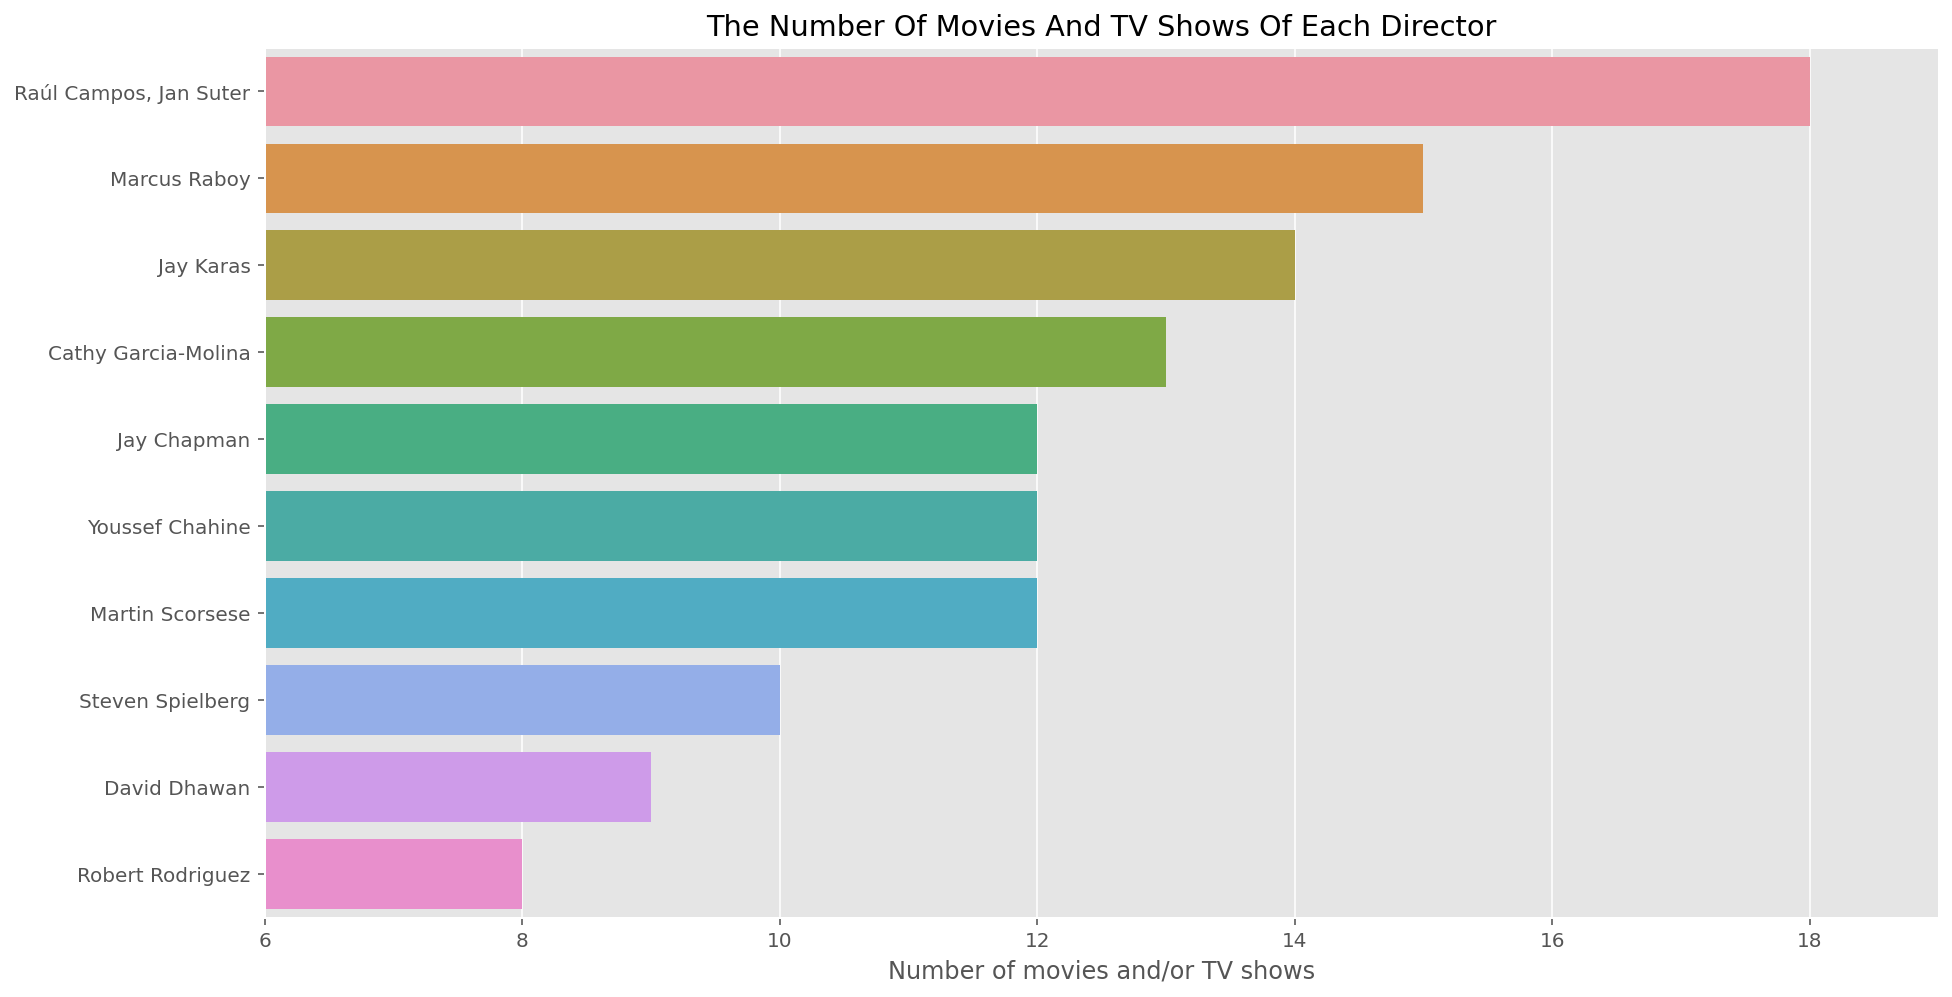

In [13]:
pf.visualize_bar_chart_for_directors(df)

18 movies is a large number in directoring. It seems like Netflix really likes Raúl Campos and Jan Suter.

### Top Netflix Casts

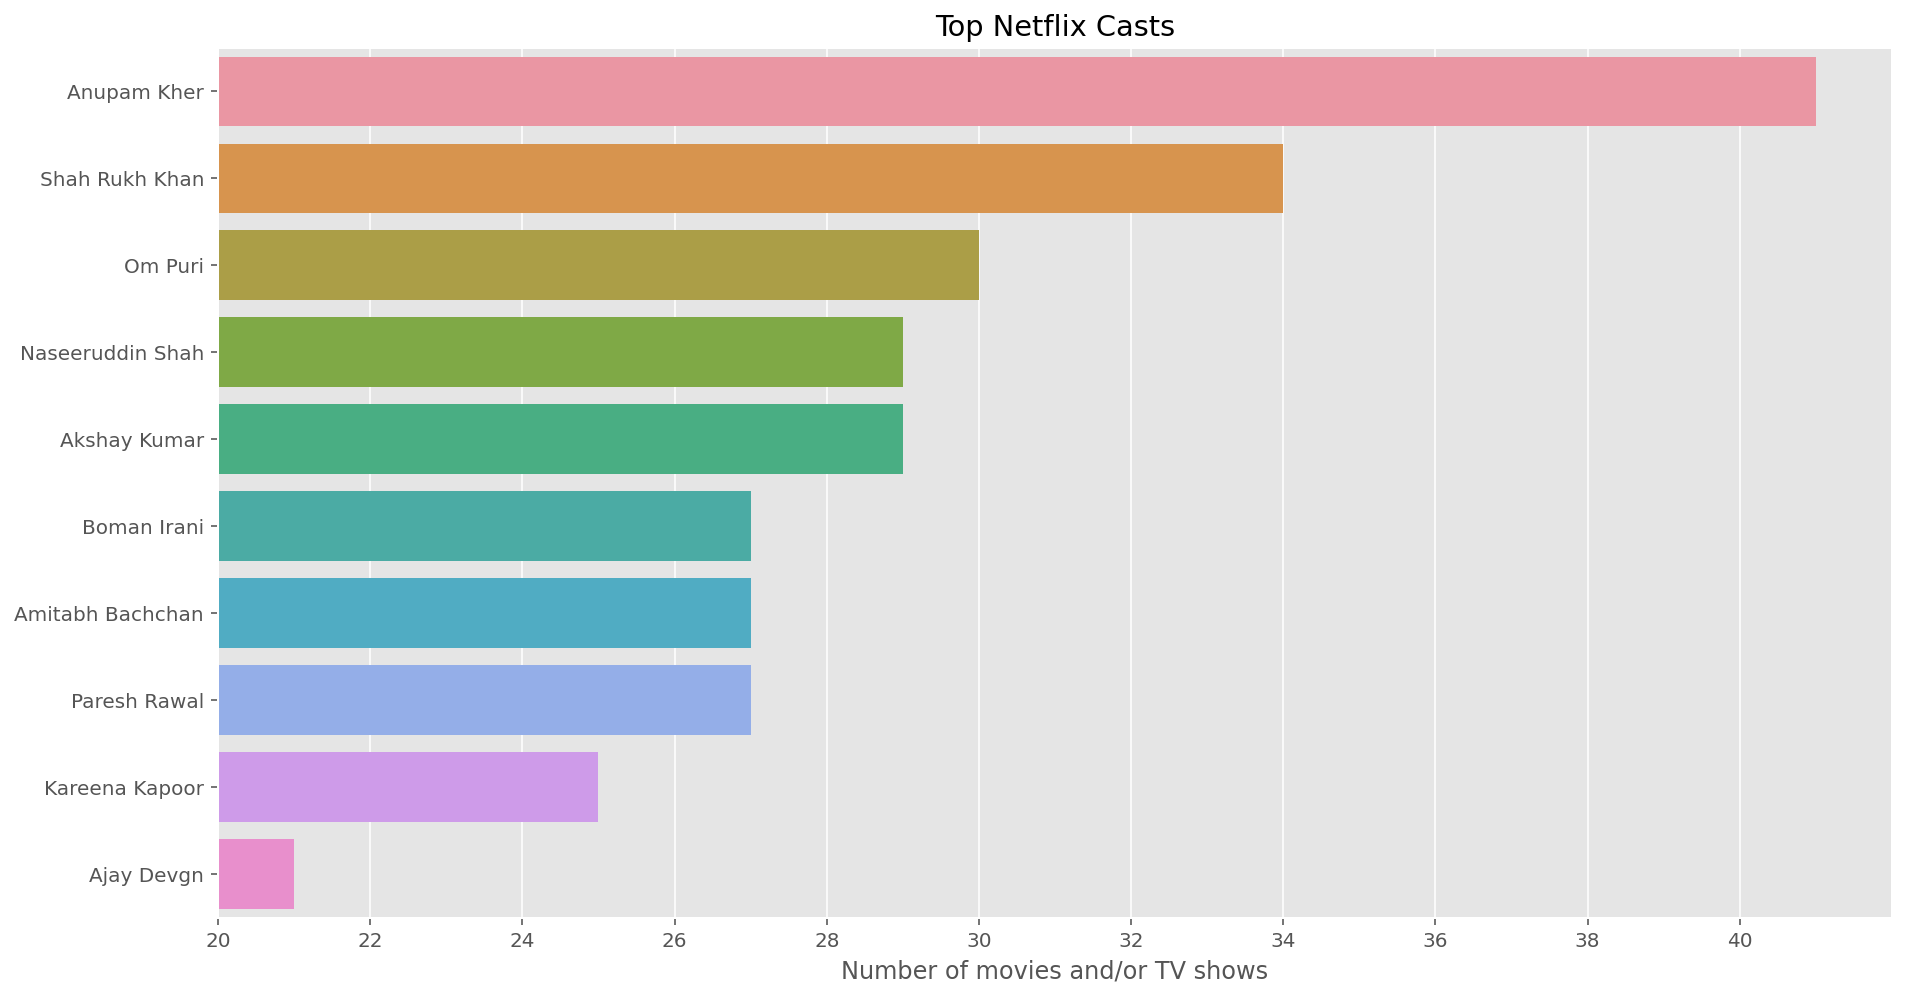

In [14]:
pf.visualize_bar_chart_for_casts(df)

Interesting observation: top 10 actors of Netflix are all Indians.

# Answering Research Questions

Our submitted research questions were:
- What director is the best in Netflix?
- What's the mean rating of Netflix shows?
- What's the average duration of a show?

We submitted these questions without really understanding the data, thus, we want to add and remove some questions. This is the new set of research questions:
- What director is the best in Netflix?
- What's the average duration of a show of Netflix?
- Who're the most frequent actors of Netflix?
- How long will a movie or TV show be available on Netlix after its release on average?
- What're the leading genres of Netflix movies?

### What director is the best in Netflix?

According to [the director bar chart](#Top-Netflix-directors), Netflix really likes to hire Raúl Campos & Jan Suter, then Marcus Raboy, Jay Karas, and Cathy Garcia-Molina.

### What's the average duration of a show of Netflix?

According to this [pair grid graph](#Release-year,-Adding-delay-year,-and-duration-correlation), it seems like the most movies' lengths are about 100 minutes and for TV shows, 1-2 seasons.

In [15]:
pf.get_durations_avg(df)

Average duration for a movie: 102.39974320564947 minutes
Average duration for a tv show: 1.9407407407407407 seasons


With the statistic above, the result matches the previous expectation.

### Who're the most frequent actors of Netflix?

In [16]:
print('The most frequent cast of Netflix is', pf.get_casts_lists(df, 1)[0][0], 'with', pf.get_casts_lists(df, 1)[1][0], 'Netflix shows/movies')

The most frequent cast of Netflix is Anupam Kher with 41 Netflix shows/movies


This is obvious by observing [this figure](#Top-Netflix-Casts). 

### How long will a movie or TV show be available on Netlix after its release on average?
Note that this is not a descriptive question since the 'Added Delay' column was created in the data processing step.

In [17]:
pf.get_delay_date_avg(df)

Delay time: 5.811120366513952 years


According to statistic, it will take a movie/TV show about 6 years to appear on Netflix. However, since there're a strong correlation between the released day and added delay, we can tell that Netflix is adopting movies and TV Shows quicker.   
Therefore, I claim that Netflix is adopting movies and TV Shows.

In [18]:
pf.get_date_year_description(df, 2000, 2021)

2000


,mean,max,min
Added Delay,18.733333,20.0,11.0


2001


,mean,max,min
Added Delay,17.71875,20.0,14.0


2002


,mean,max,min
Added Delay,17.025641,19.0,15.0


2003


,mean,max,min
Added Delay,16.102564,18.0,13.0


2004


,mean,max,min
Added Delay,14.92,17.0,13.0


2005


,mean,max,min
Added Delay,13.864407,16.0,11.0


2006


,mean,max,min
Added Delay,12.68,15.0,2.0


2007


,mean,max,min
Added Delay,11.898551,14.0,2.0


2008


,mean,max,min
Added Delay,10.707071,13.0,8.0


2009


,mean,max,min
Added Delay,9.831683,12.0,0.0


2010


,mean,max,min
Added Delay,8.508065,11.0,1.0


2011


,mean,max,min
Added Delay,7.747899,10.0,1.0


2012


,mean,max,min
Added Delay,6.52,9.0,0.0


2013


,mean,max,min
Added Delay,5.142077,8.0,0.0


2014


,mean,max,min
Added Delay,3.897321,7.0,0.0


2015


,mean,max,min
Added Delay,2.47181,5.0,0.0


2016


,mean,max,min
Added Delay,1.631673,5.0,0.0


2017


,mean,max,min
Added Delay,1.043682,4.0,0.0


2018


,mean,max,min
Added Delay,0.70626,3.0,0.0


2019


,mean,max,min
Added Delay,0.364754,2.0,0.0


2020


,mean,max,min
Added Delay,0.026385,1.0,0.0


By observing 3 summarized columns of each year, it is clear that all the metrics are decreasing throughout the years. Therefore, my claim above was accurate!

### What're the leading genres of Netflix movies?

In [19]:
print('The most frequent genre in Netflix TV Shows is', pf.get_type_label_value(df, 'TV Shows')[0][1], 'with', pf.get_type_label_value(df, 'TV Shows')[1][1], 'TV Shows.')

The most frequent genre in Netflix TV Shows is International TV Shows with 78 TV Shows.


In [20]:
print('The most frequent genre in Netflix movies is', pf.get_type_label_value(df, 'Movies')[0][1], 'with', pf.get_type_label_value(df, 'TV Shows')[1][1], 'movies.')

The most frequent genre in Netflix movies is International Movies with 78 movies.


By using [this pie chart](#Netflix's-shows-genres-proportion), Internation TV Shows accounted for 23.2% of all Netflix TV Shows while International Movies accounted for 21%.